# GRIP@The Sparks Foundation

# Task 2 : Prediction using Unsupervised Machine Learning

# Name : Ippili Amruta

In this regression task 2 : From the given dataset Iris Ihave predicted the optimum number of clusters and represent it visually

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Loading the data

In [4]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Describing the data

In [11]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
iris_df.shape

(150, 4)

In [8]:
iris_df.size

600

In [14]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Checkin the null values 

In [9]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# To find the optimal no. of cluster

In [12]:
To find the optimal no. of cluster
cluster_range = range(1,15)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster,n_init=20)
    clusters.fit(iris_df)
    cluster_errors.append(clusters.inertia_)

C:\Users\amrut\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
clusters_df = pd.DataFrame({'total_clusters': cluster_range, 
                            'cluster_errors': cluster_errors})
clusters_df[0:5]

,total_clusters,cluster_errors
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182


# Correlation Matrix

In [15]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# The Elbow Method using Distortion

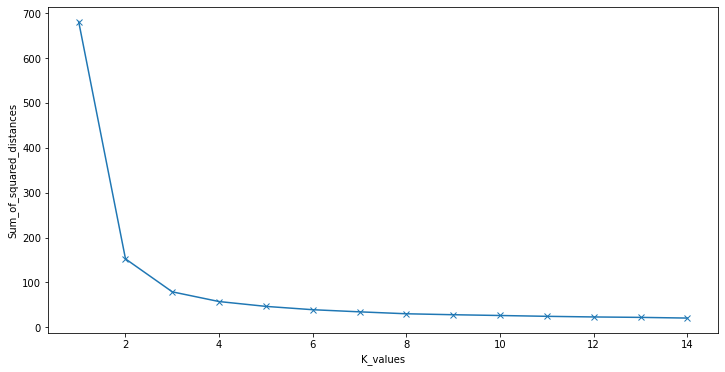

In [16]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.total_clusters, clusters_df.cluster_errors, marker = 'x') 
plt.xlabel('K_values') 
plt.ylabel('Sum_of_squared_distances') 
plt.show() 

K = 1 to K = 2 (Steep Slope)

K = 2 to K = 3 (Gentle Slope)

K = 3 (Elbow Point)

In [17]:
model = KMeans(n_clusters=3, max_iter=20)
model.fit(iris_df)

KMeans(max_iter=20, n_clusters=3)

In [19]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:>

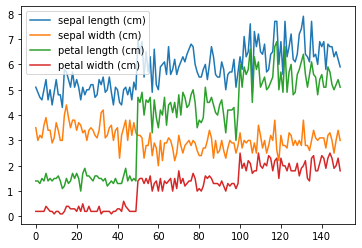

In [20]:
iris_df.plot(kind = "line")

In [21]:
iris_df.index = pd.RangeIndex(len(iris_df.index))
df_km = pd.concat([iris_df, pd.Series(model.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

# heirarchical clustering with full dendrogram

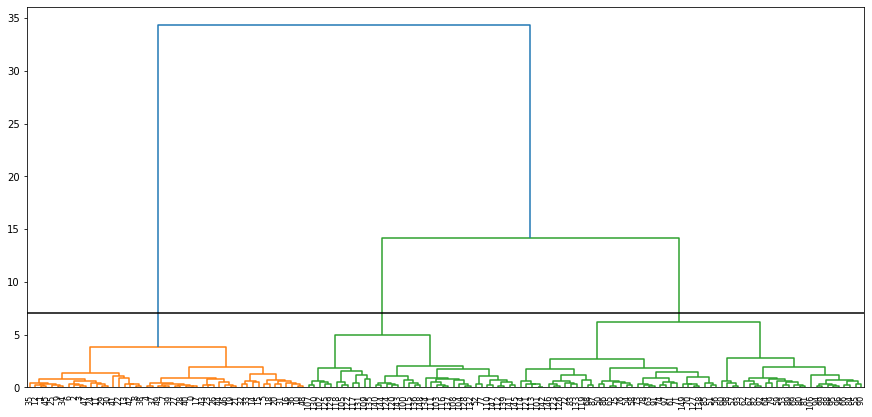

In [22]:
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')
max_d = 7.08               
dendrogram(mergings,
           truncate_mode='lastp',  
           p=150,                  
           leaf_rotation=90.,      
           leaf_font_size=8.,      
          )
plt.axhline(y=max_d, c='k')
plt.show()

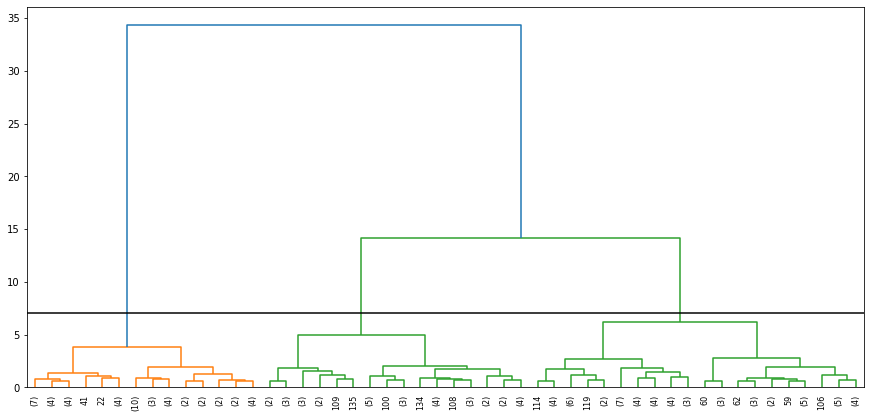

In [23]:
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')
max_d = 7.08                
dendrogram(mergings,
           truncate_mode='lastp',  
           p=50,                  
           leaf_rotation=90.,      
           leaf_font_size=8.,      
          )

plt.axhline(y=max_d, c='k')
plt.show()

# Scatter plot to visualize the data

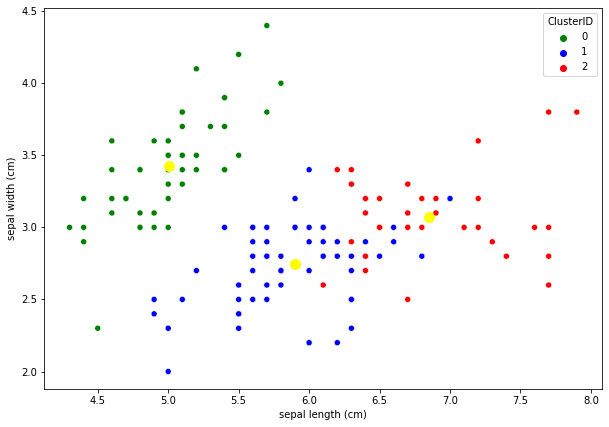

In [24]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=df_km, hue='ClusterID', palette=['green','blue','red'])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()

# Pair plot

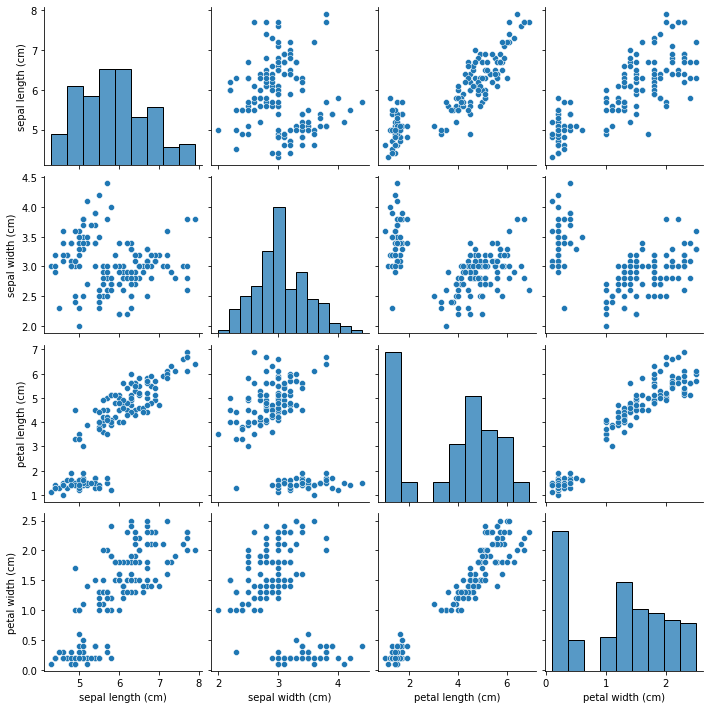

In [25]:
sns.pairplot(iris_df)

# Heatmap

<AxesSubplot:>

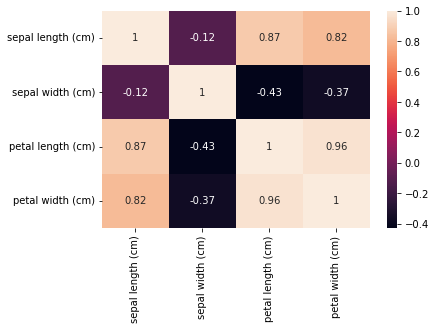

In [30]:
sns.heatmap(iris_df.corr(), annot = True)

# Histogram

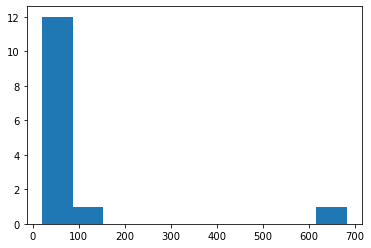

In [27]:
plt.hist(clusters_df.cluster_errors, bins = 10)
plt.show()

In [28]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
